In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv('modified.csv')

In [3]:
# Menyiapkan data
data['D.O.A'] = pd.to_datetime(data['D.O.A'])
data['D.O.D'] = pd.to_datetime(data['D.O.D'])
data['year'] = data['D.O.A'].dt.year

In [4]:
# Mengisi nilai yang hilang dengan median
data.fillna(data.median(numeric_only=True), inplace=True)

In [5]:
# Mengonversi kolom kategori ke numerik
data['GENDER'] = data['GENDER'].map({'M': 0, 'F': 1})
data['RURAL'] = data['RURAL'].map({'R': 0, 'U': 1})
data['TYPE OF ADMISSION-EMERGENCY/OPD'] = data['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 0, 'O': 1})
data['OUTCOME'] = data['OUTCOME'].map({'DISCHARGE': 0, 'EXPIRY': 1, 'DAMA': 2})
data['SMOKING'] = data['SMOKING'].map({'Tidak': 0, 'Ya': 1})
data['ALCOHOL'] = data['ALCOHOL'].map({'Tidak': 0, 'Ya': 1})
data['DM'] = data['DM'].map({'Tidak': 0, 'Ya': 1})
data['HTN'] = data['HTN'].map({'Tidak': 0, 'Ya': 1})
data['CAD'] = data['CAD'].map({'Tidak': 0, 'Ya': 1})
data['PRIOR CMP'] = data['PRIOR CMP'].map({'Tidak': 0, 'Ya': 1})
data['CKD'] = data['CKD'].map({'Tidak': 0, 'Ya': 1})

In [6]:
# Menghapus kolom yang tidak diperlukan
data.drop(['MRD No.', 'D.O.A', 'D.O.D', 'year'], axis=1, inplace=True)

In [7]:
selected_columns = ['AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'DURATION OF STAY', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'SMOKING', 'ALCOHOL']

In [8]:
X = data[selected_columns]
y = data['OUTCOME']

In [9]:
# Mengonversi kolom kategori menggunakan one-hot encoding
X = pd.get_dummies(X, drop_first=True)

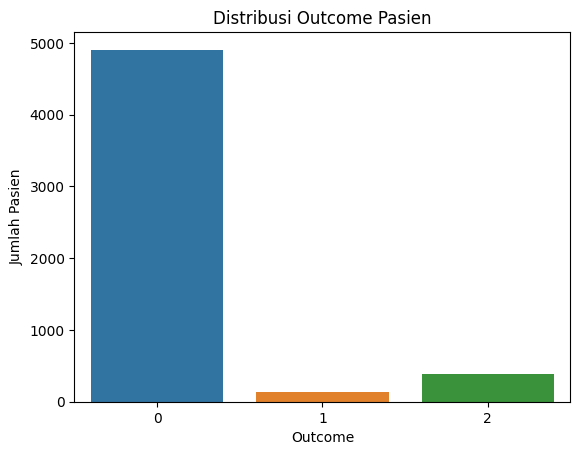

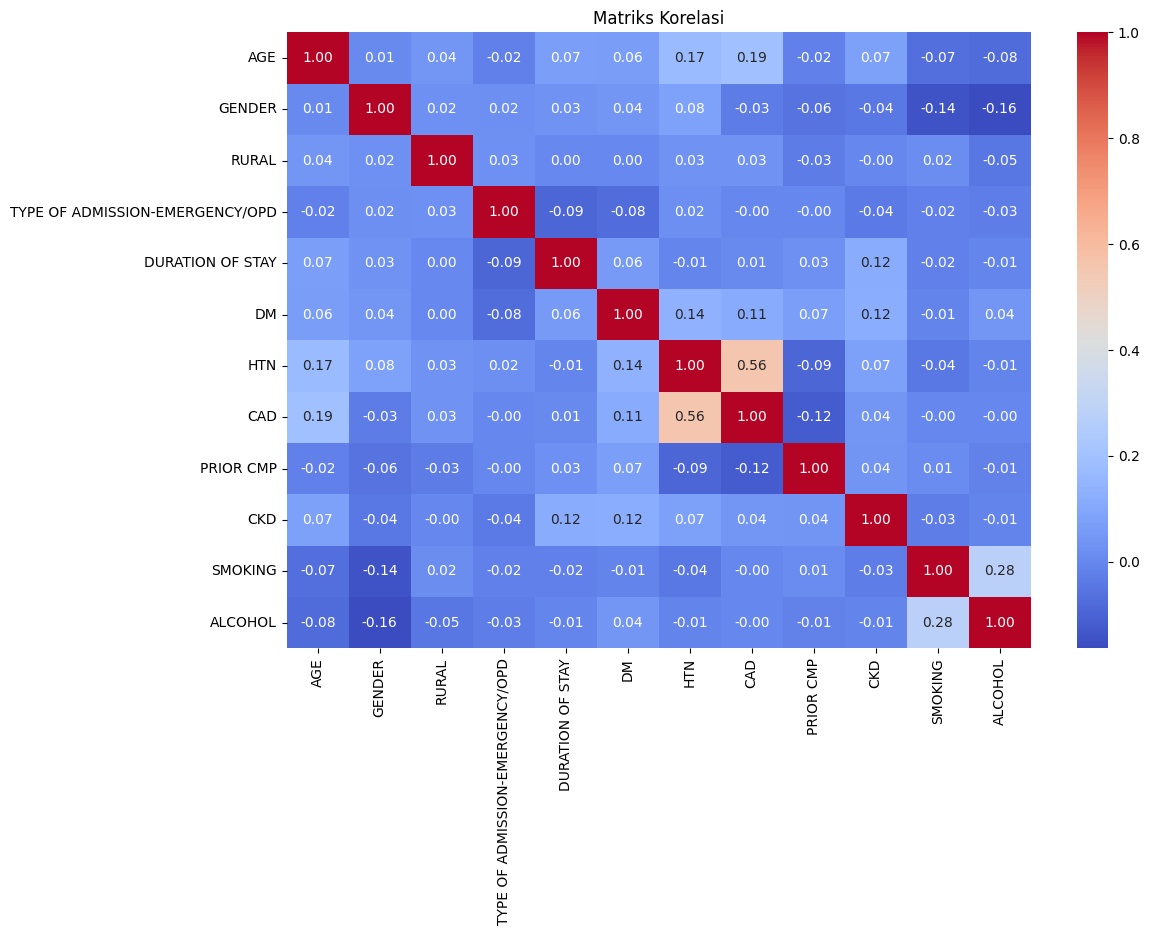

In [10]:
# Memeriksa distribusi label
sns.countplot(x=y)
plt.title('Distribusi Outcome Pasien')
plt.xlabel('Outcome')
plt.ylabel('Jumlah Pasien')
plt.show()

# Memeriksa korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


In [11]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Melakukan standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [15]:
# Mengevaluasi performa model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8998161764705882
Confusion Matrix:
[[959   3  25]
 [ 13   9   3]
 [ 64   1  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       987
           1       0.69      0.36      0.47        25
           2       0.28      0.14      0.19        76

    accuracy                           0.90      1088
   macro avg       0.63      0.49      0.54      1088
weighted avg       0.88      0.90      0.88      1088



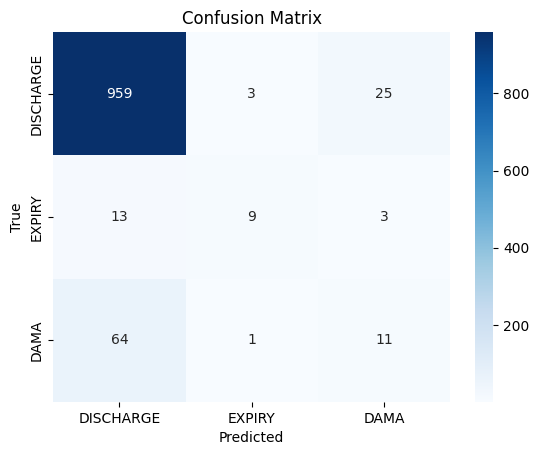

In [16]:
# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['DISCHARGE', 'EXPIRY', 'DAMA'], yticklabels=['DISCHARGE', 'EXPIRY', 'DAMA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Menyiapkan data input manual
# Contoh data input (AGE, GENDER, RURAL, TYPE OF ADMISSION-EMERGENCY/OPD, DURATION OF STAY, DM, HTN, CAD, PRIOR CMP, CKD, SMOKING, ALCOHOL)
input_data = {
    'AGE': 65,
    'GENDER': 0,
    'RURAL': 1,
    'TYPE OF ADMISSION-EMERGENCY/OPD': 0,
    'DURATION OF STAY': 10,
    'DM': 1,
    'HTN': 1,
    'CAD': 1,
    'PRIOR CMP': 0,
    'CKD': 0,
    'SMOKING': 0,
    'ALCOHOL': 0
}

# Mengonversi input data ke DataFrame
input_df = pd.DataFrame([input_data])

# Melakukan standarisasi fitur input
input_scaled = scaler.transform(input_df)  # Skalakan data input manual

# Melakukan prediksi dengan model yang telah dilatih
prediksi = model.predict(input_scaled)

# Menampilkan hasil prediksi
outcome_map = {0: 'DISCHARGE', 1: 'EXPIRY', 2: 'DAMA'}
hasil_prediksi = outcome_map[prediksi[0]]
print(f"Hasil prediksi: {hasil_prediksi}")


Hasil prediksi: DISCHARGE


In [18]:
import pickle

In [19]:
# Menyimpan model dan scaler menggunakan pickle
with open('model_random_forest.sav', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)